# Importing libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import skimage
from tensorflow import keras
from skimage import transform
from skimage import data
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.filters import threshold_mean
from tqdm import tqdm

# Functions

In [2]:
def plot(a,ix,iy):
    a=a.reshape(ix,iy)
    plt.imshow(a,cmap='viridis')
    plt.axis('off')
    
def imageprepare(image,ix,iy):
  image=resize(image,(ix,iy),mode='reflect')
  image=(image>threshold_mean(image))*2-1
  image=np.reshape(image,ix*iy)
  return image

# Image preparation

In [3]:
ix=84
iy=84
it = 1

#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


zeroPositions=np.where(y_train==0)[0]
onePositions=np.where(y_train==1)[0]
twoPositions=np.where(y_train==2)[0]
threePositions=np.where(y_train==3)[0]
fourPositions=np.where(y_train==4)[0]
fivePositions=np.where(y_train==5)[0]
sixPositions=np.where(y_train==6)[0]
sevenPositions=np.where(y_train==7)[0]
eightPositions=np.where(y_train==8)[0]
ninePositions=np.where(y_train==9)[0]

trainImg=[]
trainImg.append(x_train[zeroPositions[5]]) # random index
trainImg.append(x_train[onePositions[5]]) 
trainImg.append(x_train[twoPositions[5]]) 
trainImg.append(x_train[threePositions[5]])
trainImg.append(x_train[fourPositions[5]])
trainImg.append(x_train[fivePositions[5]])
trainImg.append(x_train[sixPositions[5]]) 
trainImg.append(x_train[sevenPositions[5]])
trainImg.append(x_train[eightPositions[5]])

train=[]
for i in range(9):
    j=i%9
    img=np.ones([ix,iy])
    img[(j%3)*28:((j%3)+1)*28,int(j/3)*28:((int(j/3))+1)*28]=trainImg[i]
    train.append(img)

train=np.array(train)
test=np.array(train)
print(train.shape)

train=train.reshape(9,84*84)
test=test.reshape(9,84*84)

num_data =  len(train)
num_neuron = train[0].shape[0]

(9, 84, 84)


In [4]:
train.shape

(9, 7056)

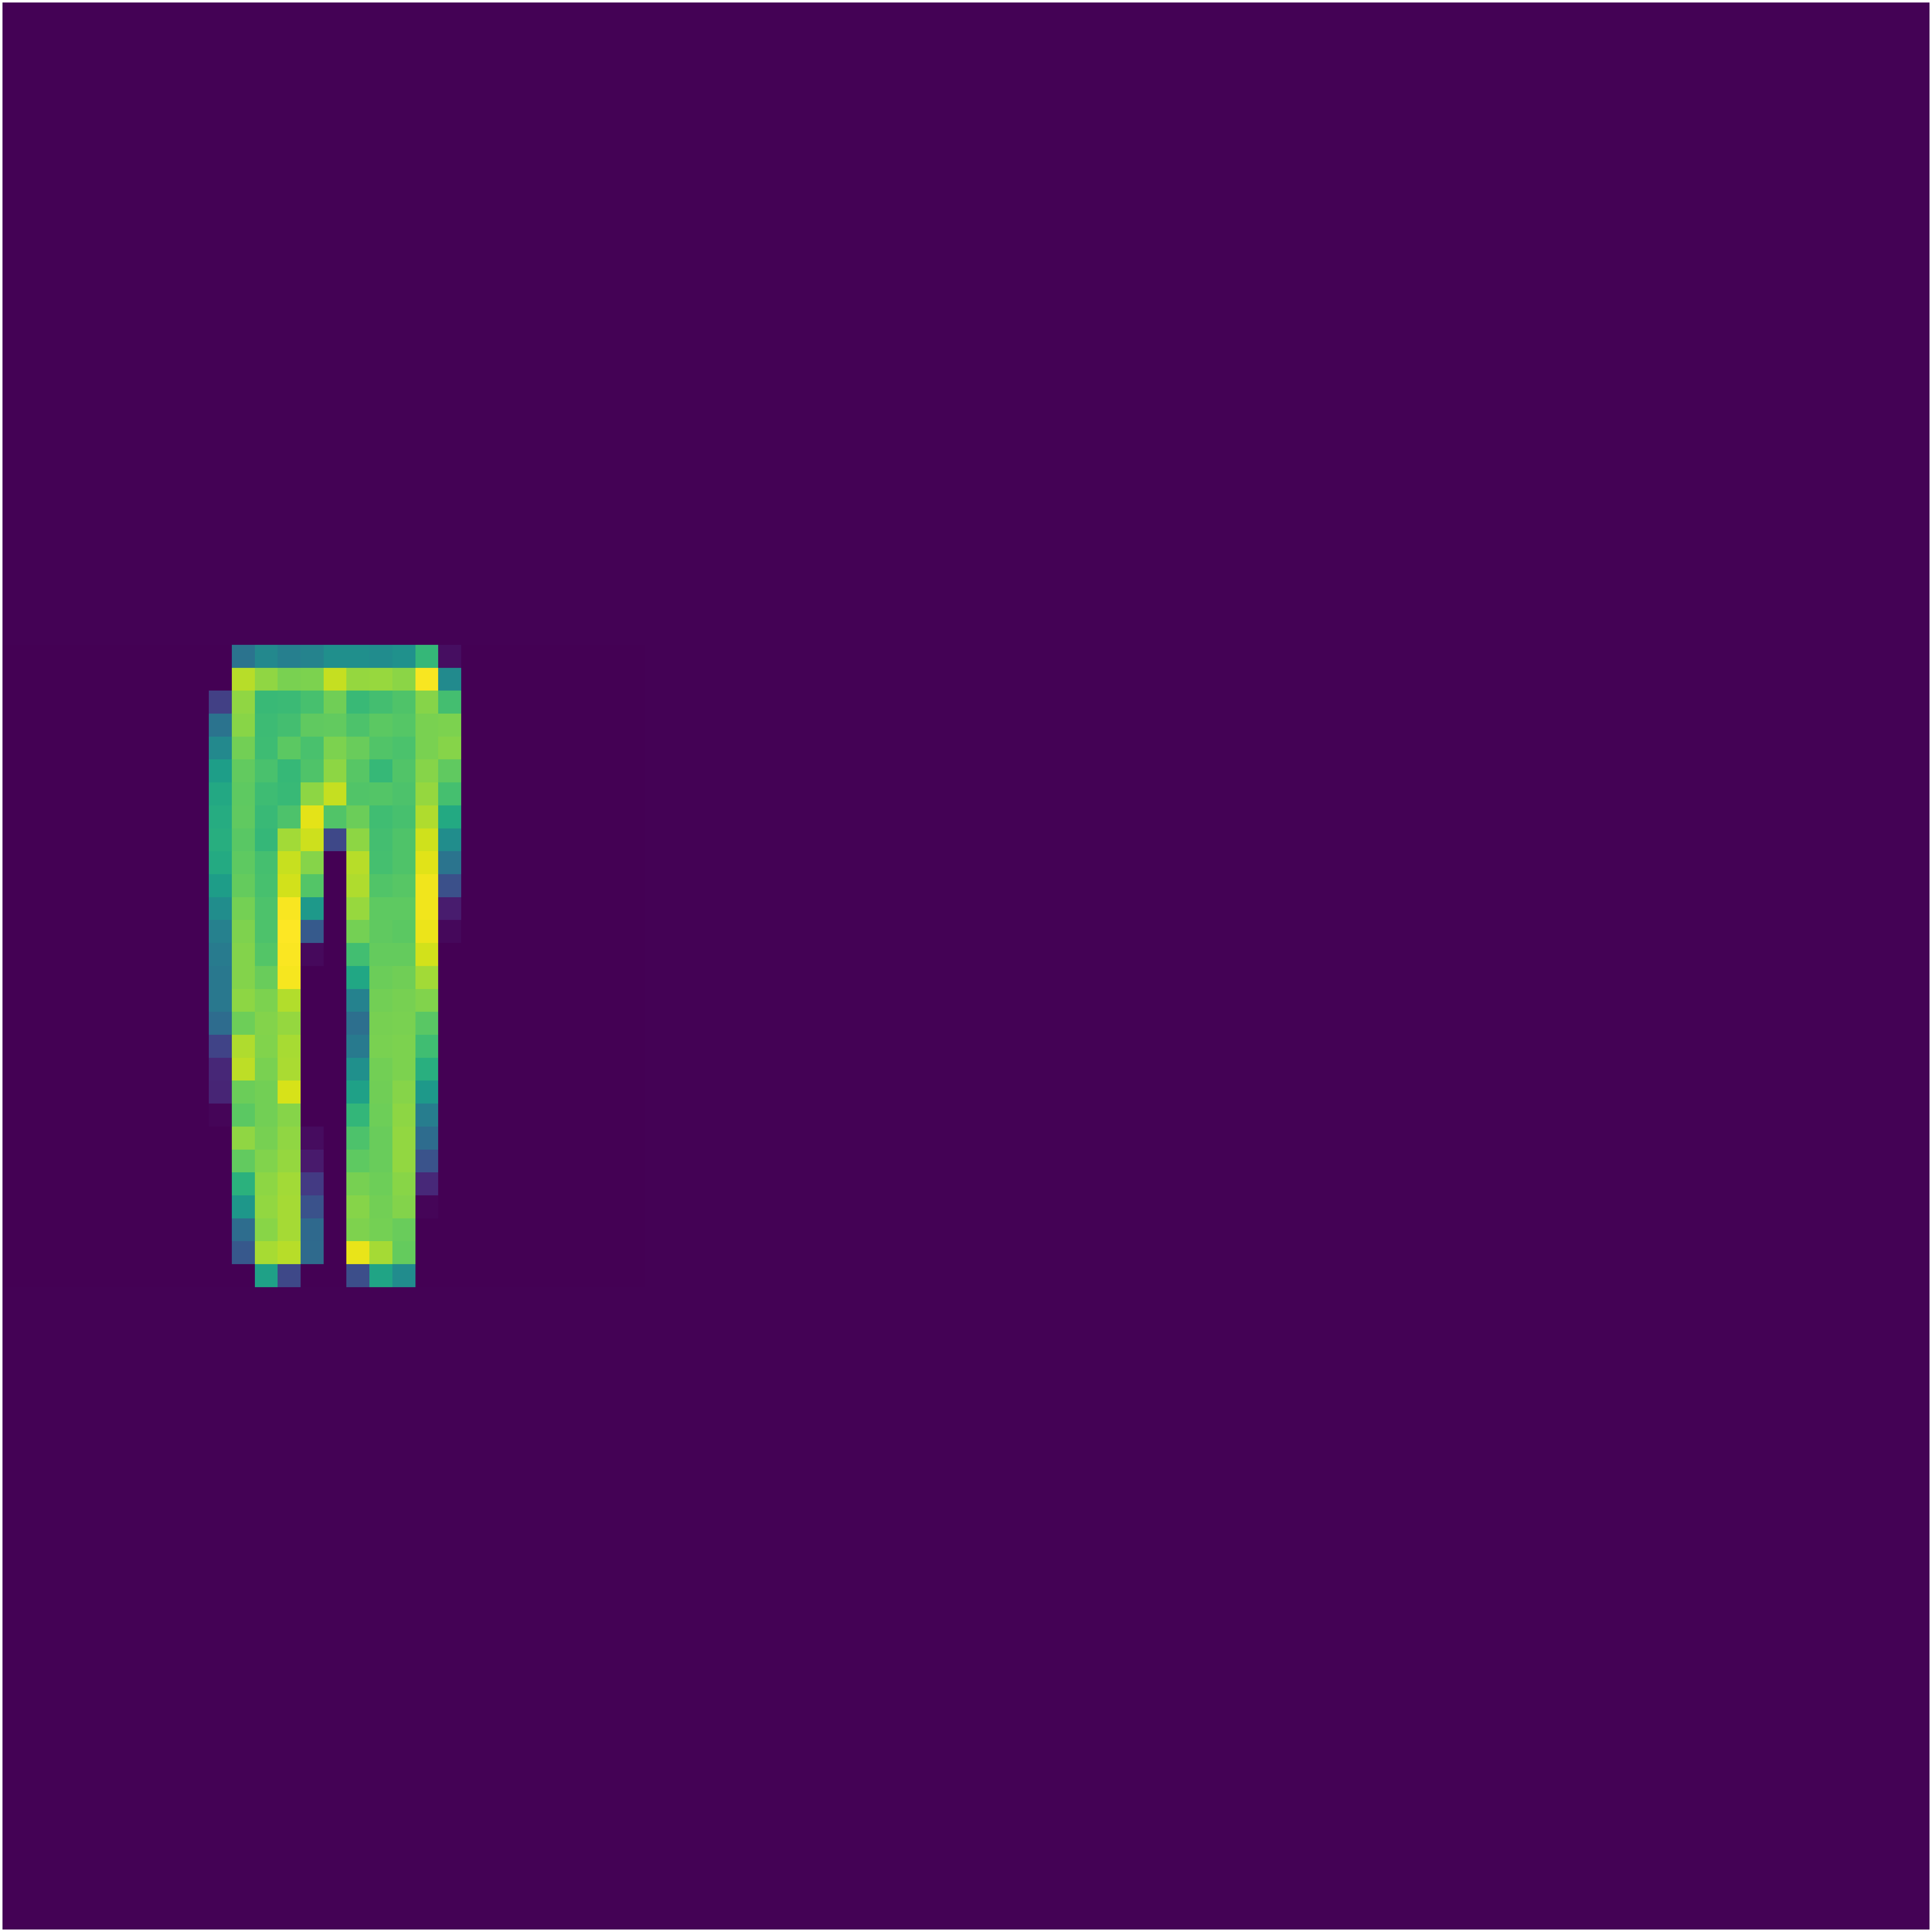

In [16]:
# plot train[0]
plot(train[1],ix,iy)

# Auto-associative

# Weight initialization

In [11]:
w=np.zeros([num_neuron,num_neuron])
rho=sum(sum(train))/(num_neuron*num_data)

for i in tqdm(range(len(train))):
    imag=train[i]-rho
    w+=np.einsum('i,j->ij',imag,imag)
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 9/9 [00:03<00:00,  2.43it/s]


# Network test

100%|██████████| 9/9 [00:00<00:00, 22.67it/s]


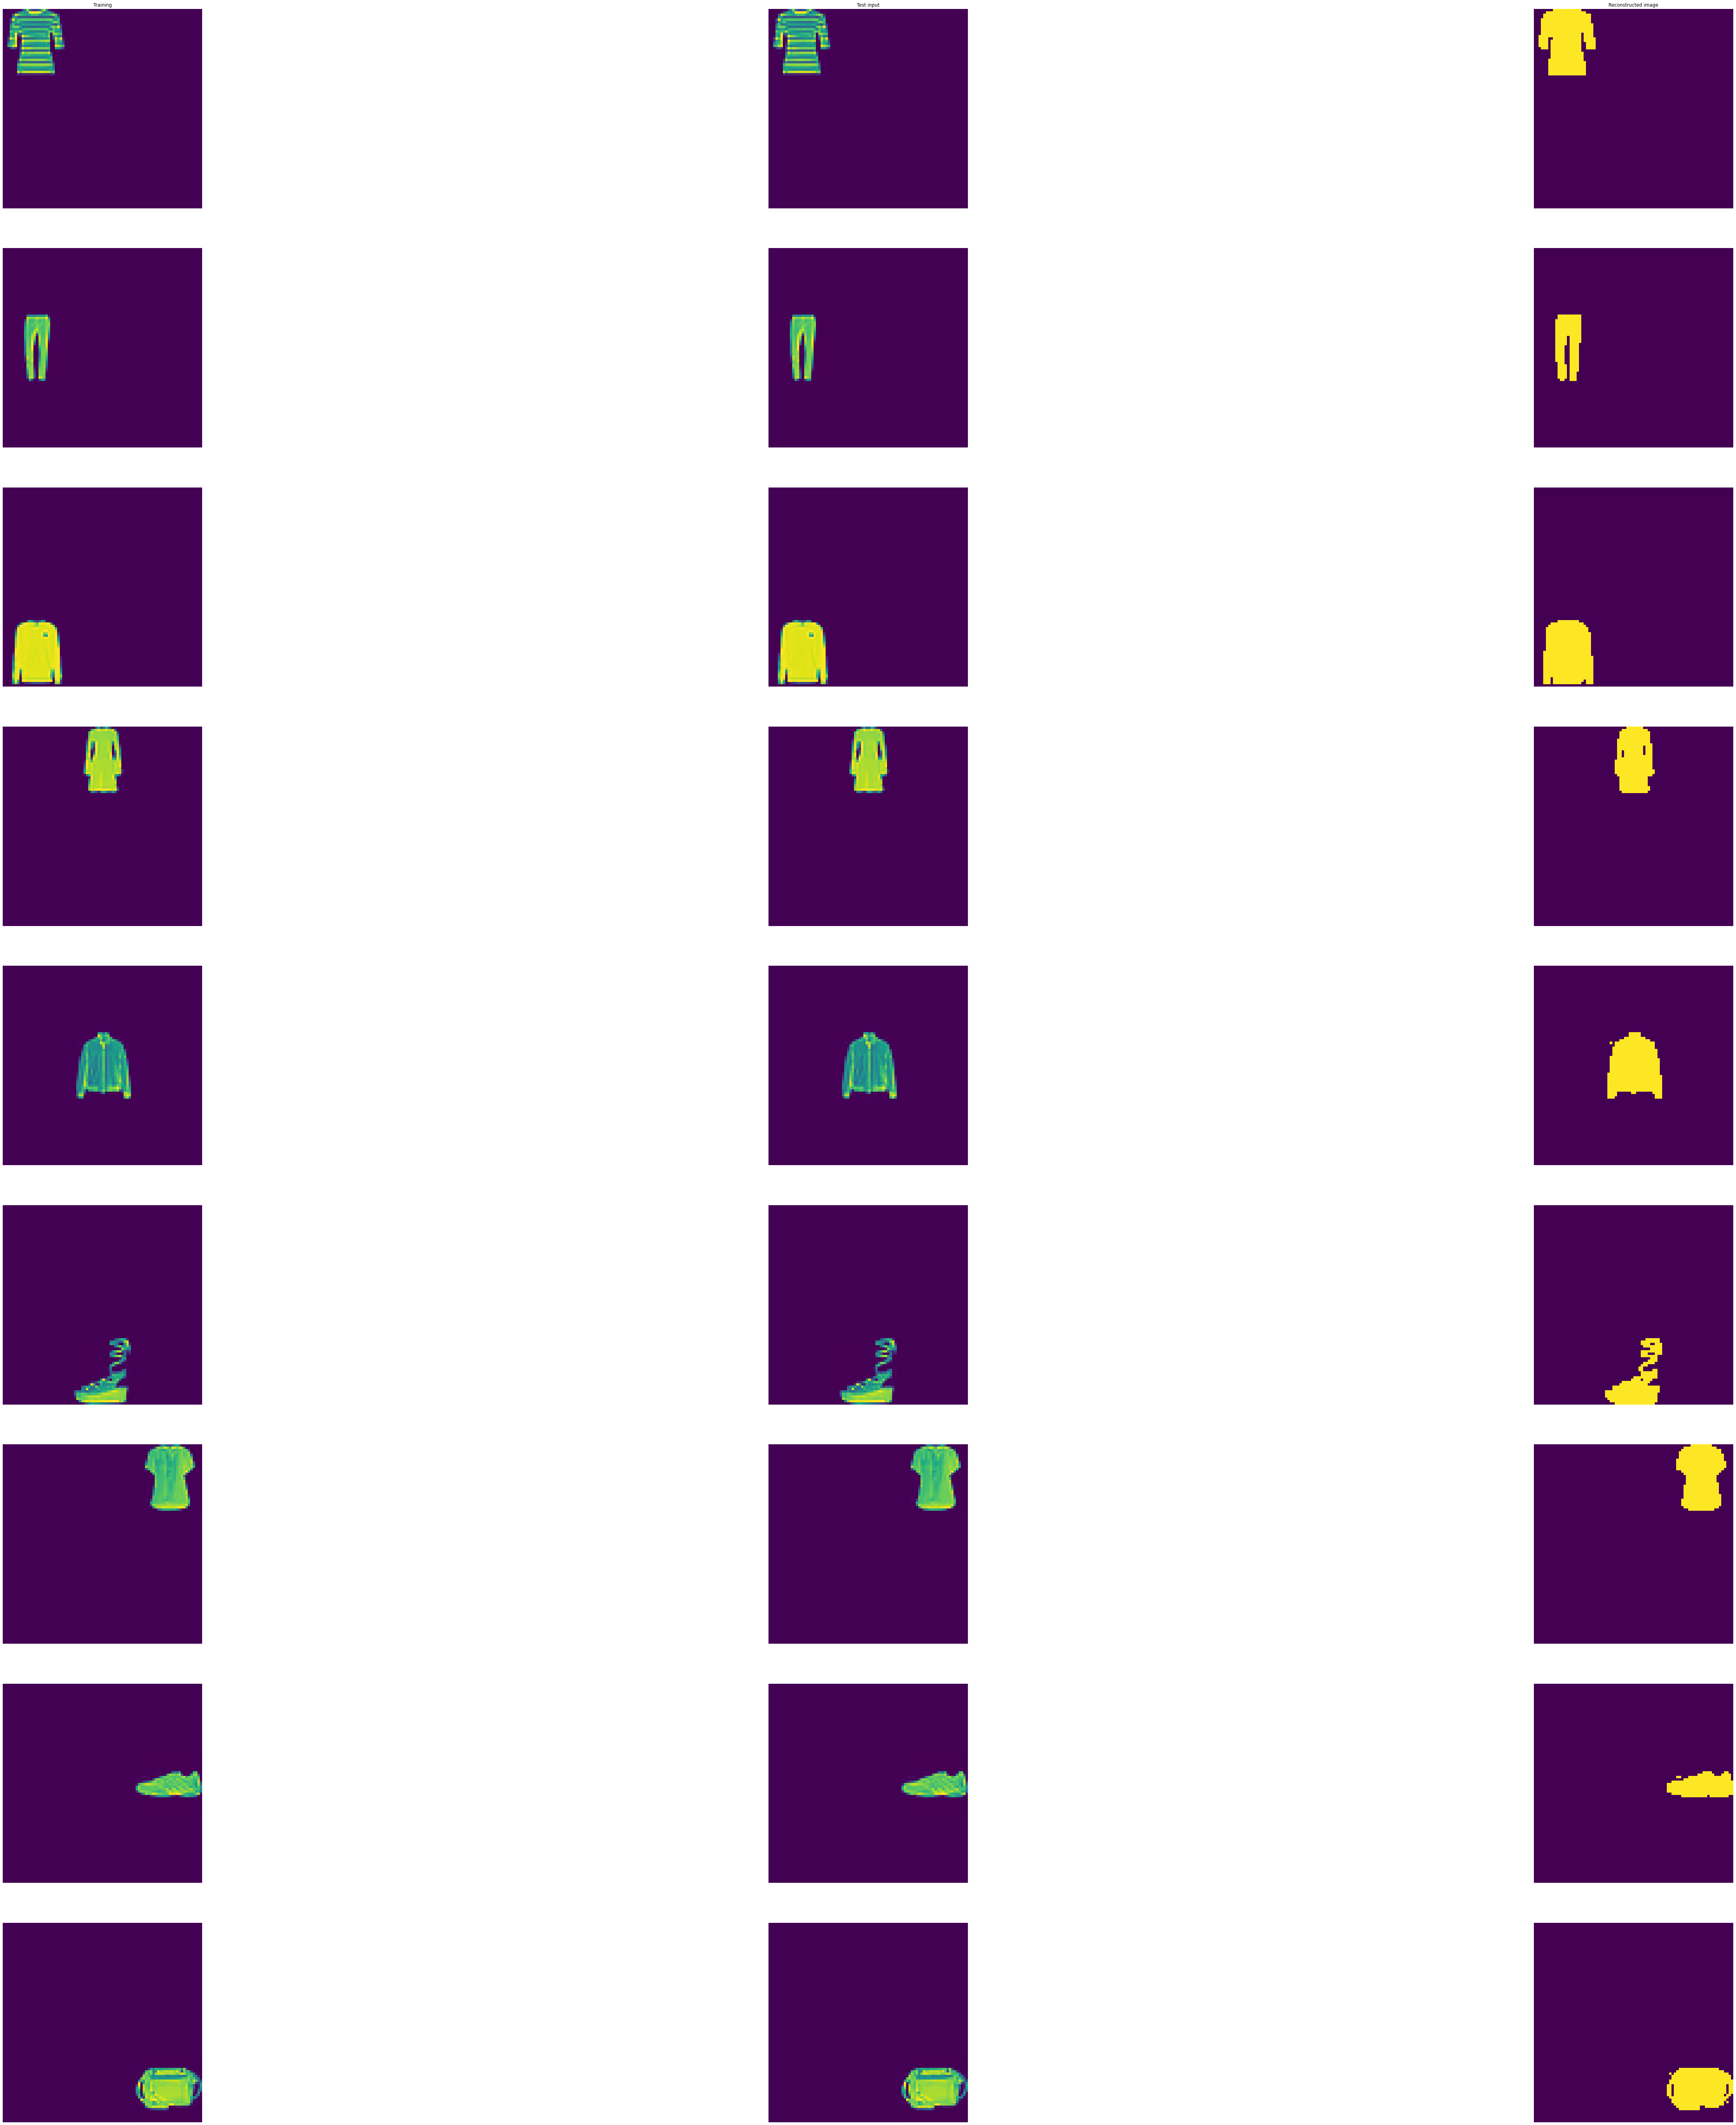

In [12]:
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)


for i in range(len(test)):
    plt.subplot(len(test),3,3*i+1);plot(train[i],ix,iy); 
    if(i==0):plt.title('Training');
    plt.subplot(len(test),3,3*i+2);plot(test[i],ix,iy); 
    if(i==0):plt.title('Test input');
    plt.subplot(len(test),3,3*i+3);plot(out[i],ix,iy); 
    if(i==0):plt.title('Reconstructed image');

# increase the size of the figure
plt.rcParams['figure.figsize'] = [100, 100]   
plt.show()

# Hetero-associative

# Weight initialization

In [7]:
w=np.zeros([num_neuron,num_neuron])
rho=sum(sum(train))/(num_neuron*num_data)

for i in tqdm(range(len(train))):
    imag=train[i]-rho
    imag2=train[(i+1)%9]-rho
    w+=np.einsum('i,j->ij',imag,imag2)
diagW = np.diag(np.diag(w))
w = w - diagW
w /= num_data

100%|██████████| 9/9 [00:03<00:00,  2.29it/s]


# Network test

100%|██████████| 9/9 [00:00<00:00, 26.59it/s]


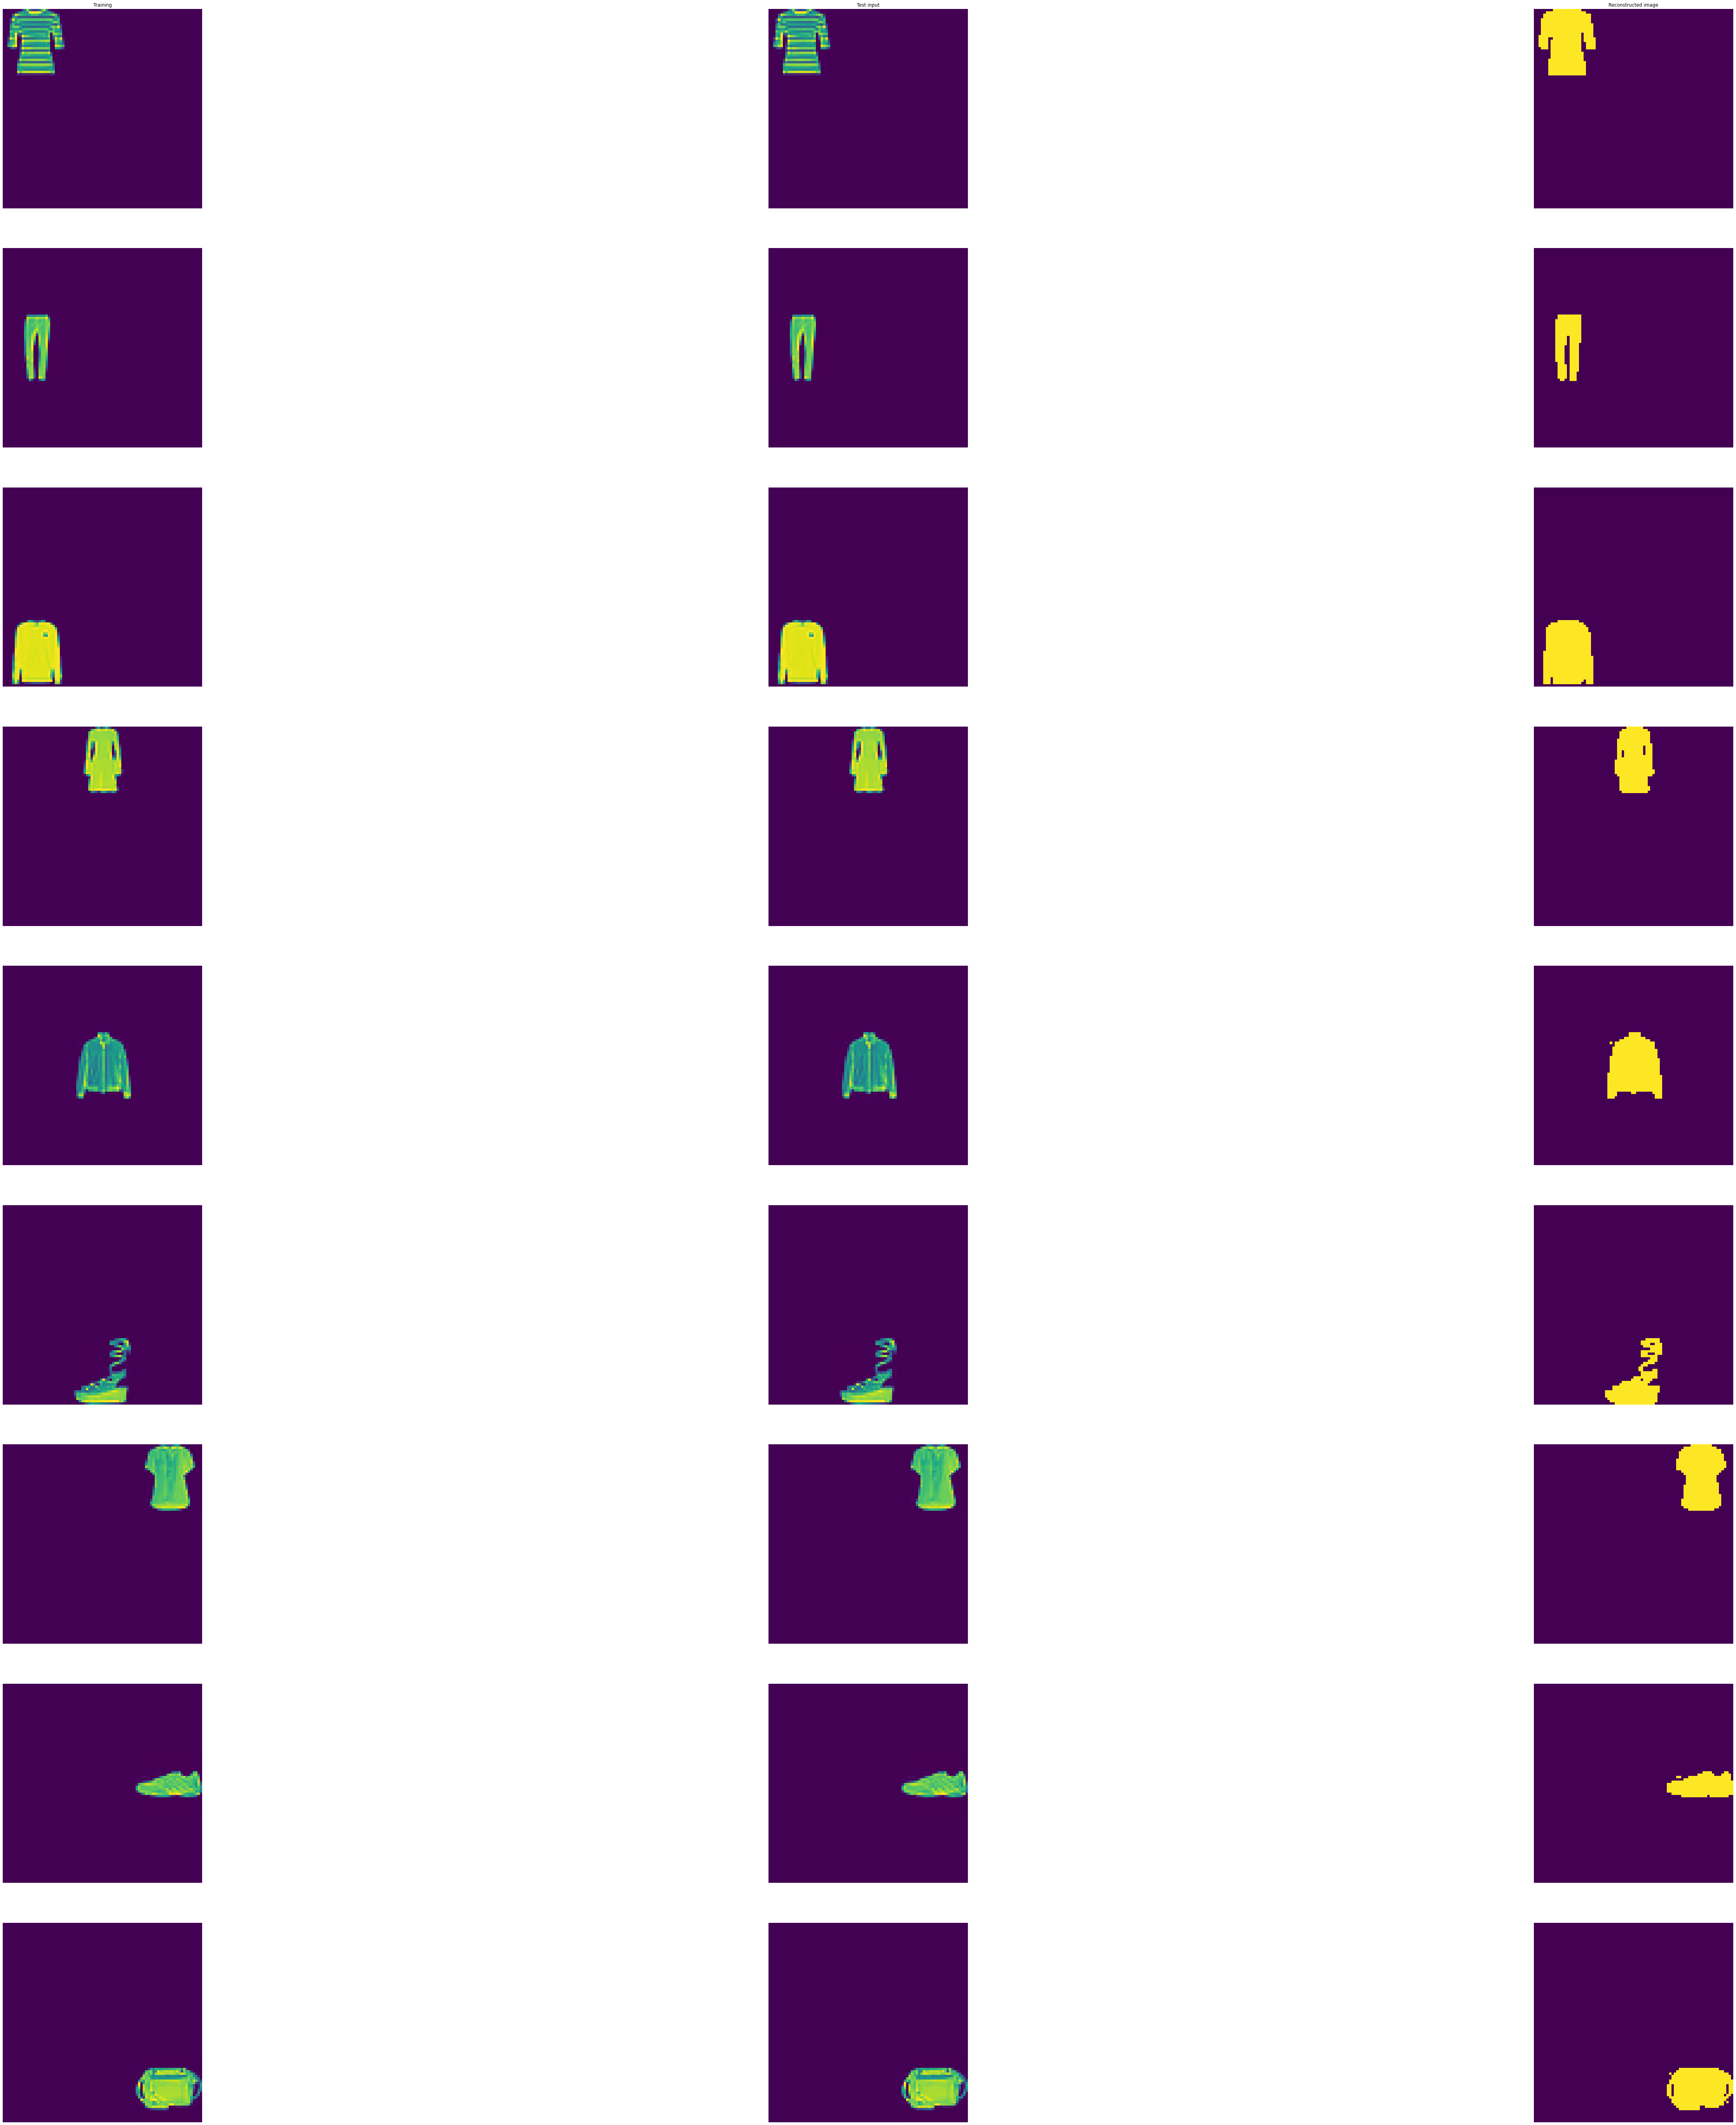

In [13]:
out=[]

for i in tqdm(range(len(test))):
    testr=np.copy(test[i])
    for j in range(it):
        testr=np.sign(w@testr)
    out.append(testr)

out=np.array(out)

for i in range(len(test)):
    plt.subplot(len(test),3,3*i+1);plot(train[i],ix,iy); 
    if(i==0):plt.title('Training');
    plt.subplot(len(test),3,3*i+2);plot(test[i],ix,iy); 
    if(i==0):plt.title('Test input');
    plt.subplot(len(test),3,3*i+3);plot(out[i],ix,iy); 
    if(i==0):plt.title('Reconstructed image');